In [1]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import glob
import numpy as np

In [3]:
ls


a.out*       cl_data_ref.dat  matrix_5.txt          matrix_final_2.txt
av_bi.dat    constants.f90    matrix_6.txt          mc17_new.f90*
bd_9.csv     constants.mod    matrix_7.txt          nohup.out
bd.csv       hi.txt           matrix_8.txt          pop.txt
bd.dat       matrix_10.txt    matrix_9.txt          r_error.txt
bs4.dat      matrix_2.txt     matrix_element.ipynb  rmsd.txt
bs4_new.dat  matrix_3.txt     matrix_element.txt
cl_av.dat    matrix_4.txt     matrix_final_1.txt


In [2]:
data=pd.read_csv('matrix_1.txt',delimiter=r'\s+',header=None)

FileNotFoundError: [Errno 2] No such file or directory: 'matrix_1.txt'

In [44]:
data.tail(8)

0         1         2         3         4         5         6  \
8632  1.399597 -0.094611 -0.104896  1.188813  0.584134  0.211299  0.135781   
8633  0.487999  1.199460  0.190897 -0.106548  0.639465  0.143391  0.593456   
8634 -0.583333  0.342876  0.532309  0.138924  0.017993 -0.185487 -0.136788   
8635  1.020846 -0.636595  0.889513  1.191229  0.007426  1.993053 -0.120955   
8636  0.530855  0.860016  0.498574  0.605321  1.165228 -0.712188  0.359994   
8637 -0.046635  0.414206 -0.213735  0.468444  0.677177  1.848738  0.418031   
8638  0.600505  0.762896 -0.204587  0.709900  1.231807 -0.505042  1.698256   
8639  0.186773 -0.427314 -0.426251  0.013273 -0.287249  0.455409  0.401673   

             7  
8632  0.186773  
8633 -0.427314  
8634 -0.426251  
8635  0.013273  
8636 -0.287249  
8637  0.455409  
8638  0.401673  
8639  1.000000

In [39]:
data1=data.iloc[::8, 4:5]


In [40]:
data1.columns =['ma_ele']

In [41]:
data1['steps'] = data1.index

In [42]:
data1

ma_ele  steps
0     0.578183      0
8     0.578183      8
16    0.578183     16
24    0.578183     24
32    0.578183     32
...        ...    ...
8600  0.584134   8600
8608  0.584134   8608
8616  0.584134   8616
8624  0.584134   8624
8632  0.584134   8632

[1080 rows x 2 columns]

<AxesSubplot:xlabel='steps', ylabel='ma_ele'>

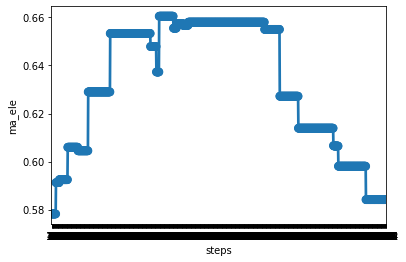

In [43]:
sns.pointplot(x="steps", y="ma_ele", data=data1)

In [8]:
#path = r'C:\DRO\DCL_rawdata_files' # use your path
all_files = glob.glob("matrix_*.txt")
print(all_files)
li = []

sum_ma=np.zeros((8,8))
sum_ma1=pd.DataFrame(sum_ma)
#print(sum_ma1)
i=0
j=0
for filename in all_files:
    
    try:
        i=i+1
        df = pd.read_csv(filename, index_col=None, header=None, delimiter=r'\s+')
        df1=df.tail(8)
        df2=pd.DataFrame(df1)
        df2.reset_index(inplace = True, drop = True)
        #print(df2)
        #sum_ma=sum_ma+df2
        #print(type(df2))
        #rint(type(sum_ma))
        #print(sum_ma)
        #sum_ma=sum(df2,sum_ma)
        sum_ma = df2.add(sum_ma, fill_value=0)
        #print(sum_ma)
        #print(df2)
    except:
        j=j+1
        pass
print(i,j)
k=i-j
print(sum_ma)
ma_final=sum_ma/k
ma_final.to_csv('matrix_final_2.txt', sep=' ',header=False, index=False)

#sum_ma=sum_ma
#print(sum_ma)
    #li.append(df)
    #print(df1)

#frame = pd.concat(li, axis=0, ignore_index=True)

['matrix_element.txt', 'matrix_2.txt', 'matrix_3.txt', 'matrix_4.txt', 'matrix_5.txt', 'matrix_6.txt', 'matrix_7.txt', 'matrix_8.txt', 'matrix_9.txt', 'matrix_10.txt', 'matrix_final_1.txt']
11 2
           0         1         2          3          4          5          6  \
0  13.795042  0.233002 -1.875586  10.231851   6.141962   3.435589   2.736065   
1   0.120611  9.671309  3.491510  -3.339490   3.303812  -2.107509   2.726923   
2  -5.034584  4.378112  7.297823   1.443875   1.332245  -2.872554  -2.052823   
3  10.283936 -3.520118  6.188572  12.389447   5.640053  12.919976   1.438630   
4   4.834497  3.541626  4.249508   5.160472  11.235314  -1.335099   2.939242   
5  -1.255561  1.335132 -1.720034   1.729257   2.139373  11.631349   2.212232   
6   4.413671  4.678574 -1.134031   3.991981   8.092074   0.685006  14.286526   
7   1.680953 -3.845829 -3.836258   0.119461  -2.585237   4.098679   3.615060   

          7  
0  1.680953  
1 -3.845829  
2 -3.836258  
3  0.119461  
4 -2.585237  


In [ ]:
ls
